In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Levantamos el dataset

In [ ]:
df = pd.read_csv("../../data/preprocessed/base.csv", sep=",")
df['periodo_dt'] = pd.to_datetime(df['periodo'].astype(str), format='%Y%m')
df.shape

# Clientes

#### Cantidad de Clientes

In [15]:
df['customer_id'].nunique()

597

#### Clientes con más compras (cantidad de registros)

In [12]:
# Cantidad de registros por cliente
compras_por_cliente = df['customer_id'].value_counts().reset_index()
compras_por_cliente.columns = ['customer_id', 'cantidad_de_compras']

# Mostrar top 10
display(compras_por_cliente.head(10))

,customer_id,cantidad_de_compras
0,10001,24914
1,10004,24234
2,10003,23927
3,10007,23257
4,10002,23224
5,10018,22461
6,10027,22395
7,10059,21783
8,10005,21189
9,10034,19506


#### Clientes que más toneladas compraron

In [17]:
# Volumen total por cliente
tn_por_cliente = (
    df.groupby('customer_id')['tn']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

tn_por_cliente.columns = ['customer_id', 'total_toneladas']
display(tn_por_cliente.head(10))


,customer_id,total_toneladas
0,10001,109203.60059
1,10002,77333.16887
2,10003,71375.91941
3,10004,63065.94269
4,10005,51467.04585
5,10006,49779.23364
6,10007,43740.39629
7,10008,41962.99046
8,10009,38742.71591
9,10011,34675.44337


In [16]:
# Juntar ambas tablas
top_clientes = compras_por_cliente.merge(tn_por_cliente, on='customer_id')

# Ordenar por toneladas
top_clientes = top_clientes.sort_values(by='total_toneladas', ascending=False)

display(top_clientes.head(10))

,customer_id,cantidad_de_compras,total_toneladas
0,10001,24914,109203.60059
4,10002,23224,77333.16887
2,10003,23927,71375.91941
1,10004,24234,63065.94269
8,10005,21189,51467.04585
15,10006,18077,49779.23364
3,10007,23257,43740.39629
98,10008,9028,41962.99046
24,10009,16415,38742.71591
18,10011,17019,34675.44337


C:\Users\iparra\AppData\Local\Temp\ipykernel_21224\364771763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


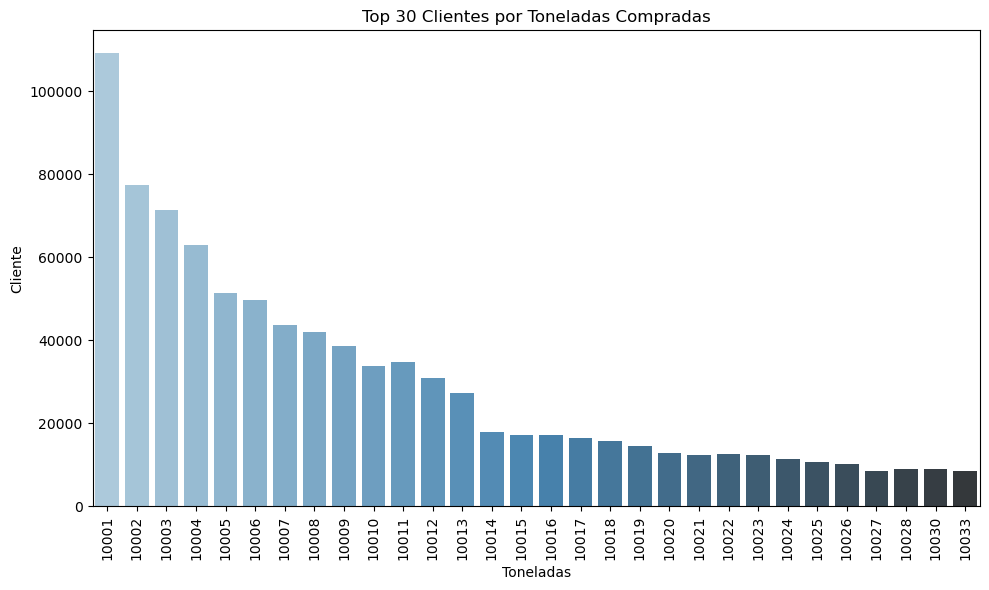

In [25]:
top_n = 30
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_clientes.head(top_n),
    x='customer_id',
    y='total_toneladas',
    palette='Blues_d'
)
plt.title(f"Top {top_n} Clientes por Toneladas Compradas")
plt.xlabel("Toneladas")
plt.ylabel("Cliente")
plt.xticks(rotation=90)  # 👈 Rotar etiquetas del eje X
plt.tight_layout()
plt.show()


# Stock Final

#### Serie de Tiempo del Stock

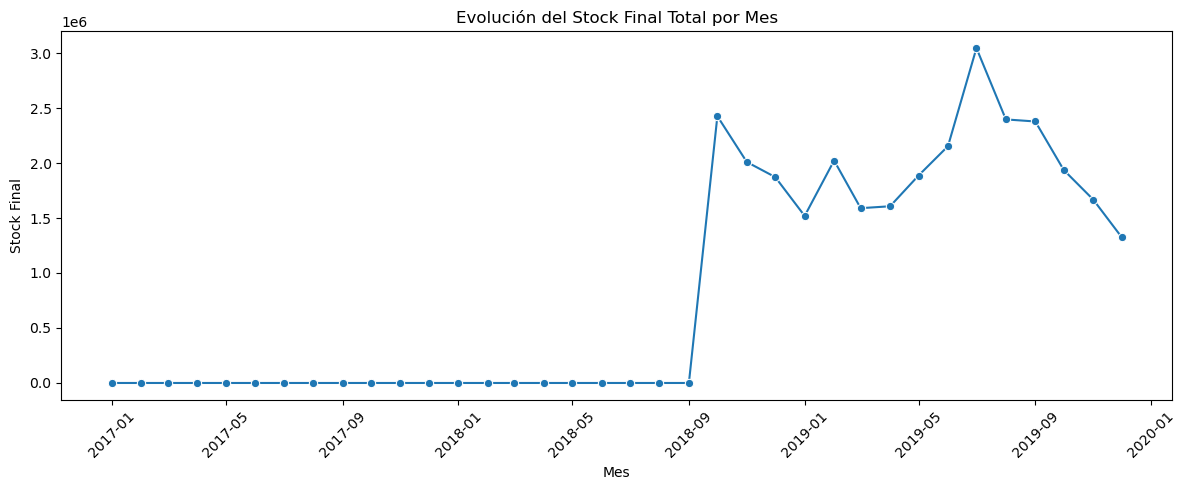

In [32]:
# Asegurar que 'periodo' esté en datetime
df['periodo_dt'] = pd.to_datetime(df['periodo'].astype(str), format='%Y%m')

# Agrupar por mes
stock_mensual = df.groupby('periodo_dt')['stock_final'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=stock_mensual, x='periodo_dt', y='stock_final', marker='o')
plt.title("Evolución del Stock Final Total por Mes")
plt.xlabel("Mes")
plt.ylabel("Stock Final")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Precios Cuidados

#### Cantidad de productos incluidos en precios cuidados

In [42]:
aux = df[df['plan_precios_cuidados'] == 1]
print(f"Total de productos en precios cuidades: {aux['product_id'].nunique()}")
print(f"Representa un {round(aux['product_id'].nunique()*100/df['product_id'].nunique(),2)}% del total de productos.")

Total de productos en precios cuidades: 42
Representa un 3.41% del total de productos.


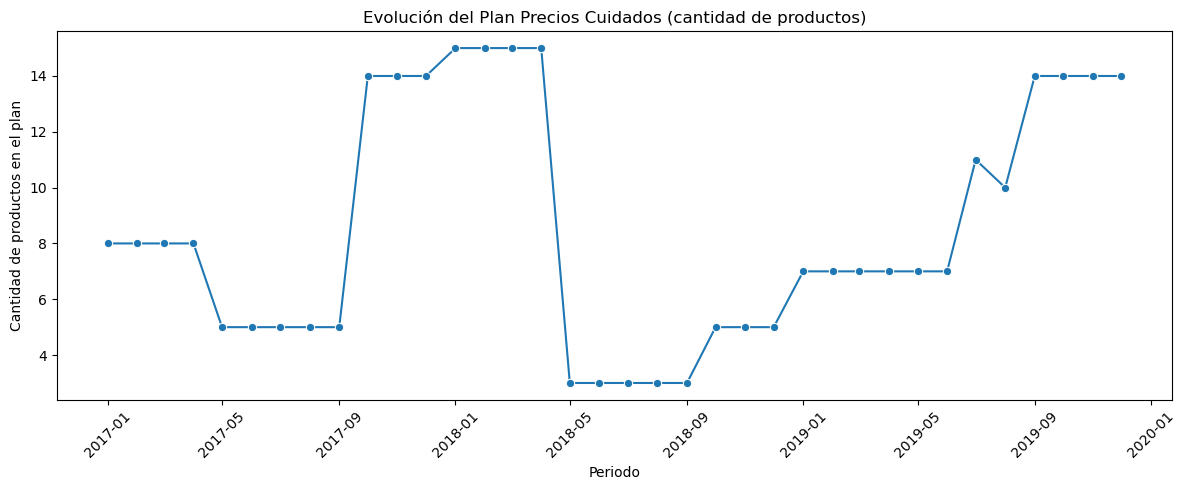

In [34]:
# Asegurar formato datetime
df['periodo_dt'] = pd.to_datetime(df['periodo'].astype(str), format='%Y%m')

# Agrupar y contar cuántos productos estuvieron en el plan por mes
evolucion_precios_cuidados = (
    df[df['plan_precios_cuidados'] == 1]
    .groupby('periodo_dt')['product_id']
    .nunique()
    .reset_index(name='productos_en_plan')
)

# Graficar
plt.figure(figsize=(12, 5))
sns.lineplot(data=evolucion_precios_cuidados, x='periodo_dt', y='productos_en_plan', marker='o')
plt.title("Evolución del Plan Precios Cuidados (cantidad de productos)")
plt.xlabel("Periodo")
plt.ylabel("Cantidad de productos en el plan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Analizar Envases

Habra tendencia a comprar productos mas chicos?


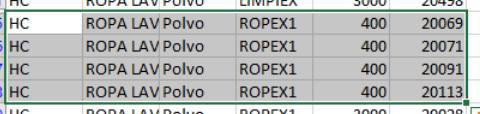

¿y esto como se come? mismo cat1, cat2, cat3, brand y sku_size, pero distinto product_id

- HC	ROPA LAVADO	Liquido	ARIEL	800	    20427
- HC	ROPA LAVADO	Liquido	ARIEL	3000	20102
- HC	ROPA LAVADO	Liquido	ARIEL	1500	20098
- HC	ROPA LAVADO	Liquido	ARIEL	3000	20001
- HC    ROPA LAVADO	Liquido	ARIEL	1000	20919

In [ ]:
def productos_size(df, lista_prods):

    # Filtrar el DataFrame
    df_filtrado = df[df['product_id'].isin(lista_prods)]

    df_agrupado = df_filtrado.groupby(['periodo_dt', 'product_id'])['tn'].sum().reset_index()

    plt.figure(figsize=(12, 6))

    for producto in lista_prods:
        datos_producto = df_agrupado[df_agrupado['product_id'] == producto]
        plt.plot(datos_producto['periodo_dt'], datos_producto['tn'], label=f'Producto {producto}')

    plt.title('Evolución de Toneladas por Producto')
    plt.xlabel('Periodo')
    plt.ylabel('Toneladas (tn)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Se sigue comprando el producto estrella.

In [ ]:
productos_size(df, [20427, 20102, 20098, 20001, 20919])

In [ ]:
# Lista de productos a graficar
productos_size(df, [20507,20582])

In [ ]:
p = [20005,20004,20003,20379,20019,20394,20501]
productos_size(df, p)

#### ¿Qué productos tienen mas de una sku_size?

In [ ]:
# 1. Agrupar y contar sku_size distintos
df_grouped = (
    df.groupby(['cat1', 'cat2', 'cat3', 'brand'])
    .agg({'sku_size': pd.Series.nunique})  # Cuenta valores únicos
    .reset_index()
    .rename(columns={'sku_size': 'count_sku_sizes'})
)

# 2. Filtrar grupos con más de 1 sku_size
df_filtered = df_grouped[df_grouped['count_sku_sizes'] > 1]

# 3. Ordenar por cantidad de tamaños (descendente)
df_result = df_filtered.sort_values('count_sku_sizes', ascending=False)

# Mostrar resultado
print(df_result)

In [ ]:
# 1. Seleccionar las columnas que definen un producto único
columnas_unicas = ['cat1', 'cat2', 'cat3', 'brand', 'sku_size']

# 2. Contar combinaciones únicas (productos reales distintos)
productos_unicos = df[columnas_unicas].drop_duplicates()
cantidad_productos_reales = len(productos_unicos)

print(f"✅ Cantidad real de productos únicos: {cantidad_productos_reales}")
print(f"📊 Cantidad original de product_id: {df['product_id'].nunique()}")

# Target


#### 🎯 **Objetivo del modelo:**

Predecir, el **día 2 del mes `M`**, cuántas **toneladas (tn)** se van a vender de cada producto durante el mes `M+2`.

#### ✅ Ejemplo concreto

* Si hoy es **1 de mayo**, y el mes de corte fue abril (`periodo = 201804`)
* Tu modelo debe usar como último dato válido todo lo ocurrido hasta abril (`201804`)
* Y debe predecir las toneladas que se venderán en junio (`201806`)
* Entonces tu target será: `tn` del periodo `201806`


```python
# Asegurar que 'periodo' sea string o int para orden
df['periodo'] = df['periodo'].astype(int)

# Agregación por producto y mes
ventas_mensuales = (
    df.groupby(['product_id', 'periodo'])['tn']
    .sum()
    .reset_index()
    .sort_values(['product_id', 'periodo'])
)
```


### 🧩 Paso 2: **Crear la variable `target`**

Ahora podés crear fácilmente la `target_tn_mes_mas2`:

```python
ventas_mensuales['target_tn_mes_mas2'] = (
    ventas_mensuales.groupby('product_id')['tn']
    .shift(-2)
)
```



### 🧠 ¿Qué características (`features`) podés usar?

Podés enriquecer el dataset con features derivadas de la serie de tiempo, como:

#### 📌 Lags:

```python
ventas_mensuales['lag_1'] = ventas_mensuales.groupby('product_id')['tn'].shift(1)
ventas_mensuales['lag_2'] = ventas_mensuales.groupby('product_id')['tn'].shift(2)
ventas_mensuales['lag_3'] = ventas_mensuales.groupby('product_id')['tn'].shift(3)
```

#### 📌 Medias móviles:

```python
ventas_mensuales['rolling_3_mean'] = (
    ventas_mensuales.groupby('product_id')['tn']
    .shift(1)
    .rolling(window=3)
    .mean()
    .reset_index(level=0, drop=True)
)
```

#### 📌 Estacionalidad:

Extraer mes para capturar patrones de estacionalidad:

```python
ventas_mensuales['periodo_dt'] = pd.to_datetime(ventas_mensuales['periodo'].astype(str), format='%Y%m')
ventas_mensuales['mes'] = ventas_mensuales['periodo_dt'].dt.month
```

---

### ✅ Resultado final: dataset a nivel `producto–mes`

Con columnas como:

| product\_id | periodo | tn | lag\_1 | lag\_2 | rolling\_3\_mean | mes | target\_tn\_mes\_mas2 |
| ----------- | ------- | -- | ------ | ------ | ---------------- | --- | --------------------- |

---

### 🔮 ¿Cómo predecir?

Ahora podés:

* Usar modelos de **machine learning supervisado** (XGBoost, LightGBM, etc.) sobre ese dataset.
* O bien, generar una **serie de tiempo individual por producto** y aplicar modelos como:

  * ARIMA
  * Prophet
  * LightGBM con `TimeSeriesSplit`
  * Exponential smoothing
  * etc.


In [58]:
# Asegurar que 'periodo' sea string o int para orden
df['periodo'] = df['periodo'].astype(int)

#🧩 Paso 1: Agregación por producto y mes
ventas_mensuales = (
    df.groupby(['product_id', 'periodo'])['tn']
    .sum()
    .reset_index()
    .sort_values(['product_id', 'periodo'])
)

# 🧩 Paso 2: Crear la variable target
ventas_mensuales['target_tn_mes_mas2'] = (
    ventas_mensuales.groupby('product_id')['tn']
    .shift(-2)
)

In [60]:
ventas_mensuales[ventas_mensuales['product_id']==20001]

,product_id,periodo,tn,target_tn_mes_mas2
0,20001,201701,934.77222,1303.35771
1,20001,201702,798.01620,1069.96130
2,20001,201703,1303.35771,1502.20132
3,20001,201704,1069.96130,1520.06539
4,20001,201705,1502.20132,1030.67391
5,20001,201706,1520.06539,1267.39462
6,20001,201707,1030.67391,1316.94604
7,20001,201708,1267.39462,1439.75563
8,20001,201709,1316.94604,1580.47401
9,20001,201710,1439.75563,1049.38860
